# Tensorflow MNIST pour débutants
Ce Notebook permet aux débutants d'apprendre à développer un premier modèle de classification sur le dataset MNIST, en utilisant l'API Keras.

In [1]:
# pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## 1. Chargement des données et Normalisation

In [3]:
# Chargement des données MNIST
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

print('trainset:', X_train.shape) # 60,000 images
print('testset:', X_test.shape) # 10,000 images

# Normalisation des données
X_train = X_train / 255
X_test = X_test / 255

11490434/11490434 [==============================] - 8s 1us/step
trainset: (60000, 28, 28)
testset: (10000, 28, 28)


## 2. Visualisation des données

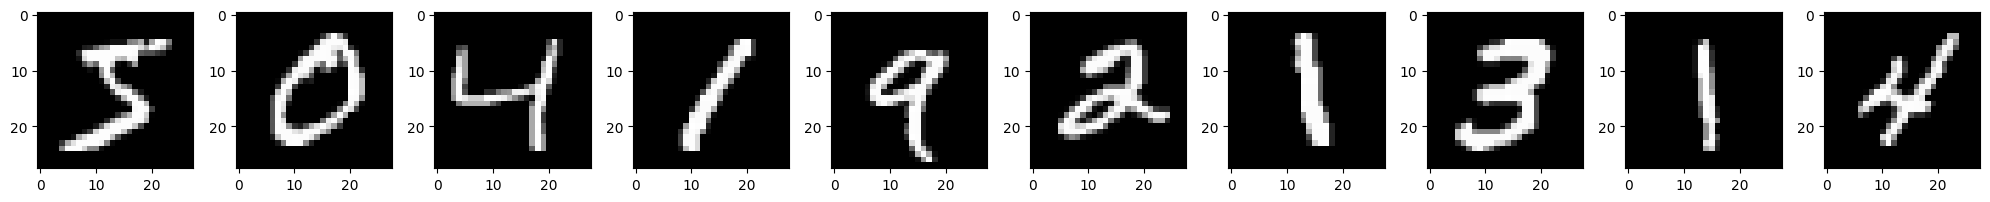

In [4]:
# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()

## 3. Configuration des Couches du Réseau de Neurones

In [5]:
# Configuration des couches du réseau
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## 4. Entrainement du Réseau de Neurones

In [6]:
# Compilation du modele
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement du modele
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.2269 - accuracy: 0.9337
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0951 - accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0686 - accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0496 - accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0330 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0262 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0222 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

## 5. Évaluation du réseau de neurone sur les données de Test

In [7]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0971 - accuracy: 0.9780
Test accuracy: 0.9779999852180481


## 6. Création d'un modele prédictif

In [8]:
# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)

print(predictions[:10])
print(y_test[:10])

313/313 [==============================] - 1s 2ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]
